**Import Required Libraries**

- Imports Pandas for data handling, TensorFlow/Keras for model building, and scikit-learn for preprocessing and data splitting.
- Also includes libraries for tokenizing text and plotting results.


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

**Load the IMDB Dataset**

- Loads the IMDB movie reviews dataset from a CSV file using Pandas.
- Each entry contains a text review and its corresponding sentiment label.


In [16]:
df = pd.read_csv("/home/hrishikalanke/Ritesh/IMDB-Dataset.csv")

**Encode Sentiment Labels**

- Converts sentiment labels ('positive' and 'negative') into binary format using `LabelEncoder`.
  - Typically: 'positive' → 1, 'negative' → 0.


In [17]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

**Text Tokenization and Padding**

- Initializes a tokenizer with a vocabulary limit and special token for out-of-vocabulary words.
- Converts reviews into sequences of integers.
- Pads sequences to a uniform length for model input.


In [18]:
vocab_size = 10000
max_length = 200
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded = pad_sequences(sequences, maxlen=max_length, truncating='post')

**Split the Dataset**

- Splits the padded sequences and sentiment labels into training and testing sets.
- 80% for training, 20% for testing.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'], test_size=0.2, random_state=42)

**Build the Sentiment Classification Model**

- Defines a sequential model with:
  - An embedding layer to learn word vectors.
  - A global average pooling layer to reduce dimensions.
  - A dense hidden layer with ReLU activation.
  - A final dense output layer with sigmoid for binary classification.


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**Compile and Train the Model**

- Compiles the model using:
  - Binary cross-entropy loss for binary classification.
  - Adam optimizer.
- Trains the model for 5 epochs with a batch size of 512.
- Uses validation data to monitor performance.


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
79/79 - 2s - 27ms/step - accuracy: 0.6926 - loss: 0.6305 - val_accuracy: 0.8106 - val_loss: 0.5016
Epoch 2/5
79/79 - 1s - 18ms/step - accuracy: 0.8311 - loss: 0.4132 - val_accuracy: 0.8522 - val_loss: 0.3546
Epoch 3/5
79/79 - 1s - 18ms/step - accuracy: 0.8687 - loss: 0.3212 - val_accuracy: 0.8656 - val_loss: 0.3156
Epoch 4/5
79/79 - 1s - 18ms/step - accuracy: 0.8890 - loss: 0.2802 - val_accuracy: 0.8728 - val_loss: 0.2998
Epoch 5/5
79/79 - 1s - 18ms/step - accuracy: 0.8993 - loss: 0.2569 - val_accuracy: 0.8630 - val_loss: 0.3118


**Evaluate the Model**

- Evaluates the trained model on the test dataset.
- Prints the final loss and accuracy metrics.


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.3099
Test Loss: 0.3118, Test Accuracy: 0.8630


**Visualize Training and Validation Metrics**

- Plots training and validation accuracy across epochs.
- Plots training and validation loss to understand model performance and overfitting.


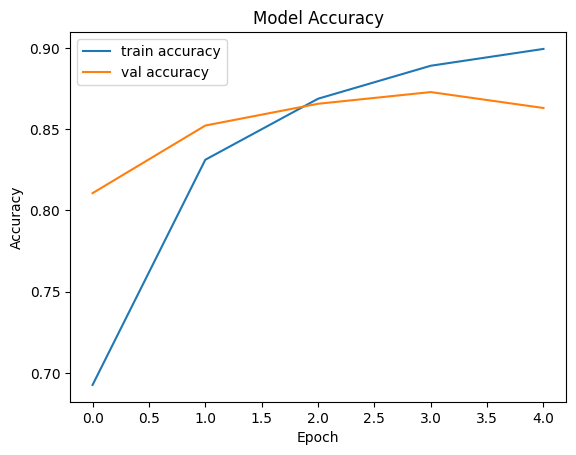

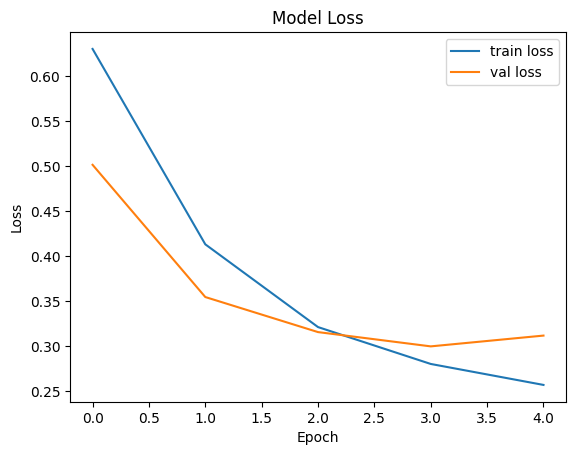

In [23]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Display Predictions vs Actual Sentiment**

- Compares the predicted sentiment scores (logits) with actual sentiment labels for the first 10 test samples.


In [29]:
import numpy as np

# Ensure y_test is a NumPy array
y_test_array = np.array(y_test)

# Display predictions vs actual labels
for i in range(10):
    print(f"Review {i+1}: Predicted = {predicted_labels[i][0]}, Actual = {y_test_array[i]}")


Review 1: Predicted = 0, Actual = 1
Review 2: Predicted = 1, Actual = 1
Review 3: Predicted = 0, Actual = 0
Review 4: Predicted = 1, Actual = 1
Review 5: Predicted = 0, Actual = 0
Review 6: Predicted = 1, Actual = 1
Review 7: Predicted = 1, Actual = 1
Review 8: Predicted = 1, Actual = 1
Review 9: Predicted = 1, Actual = 0
Review 10: Predicted = 0, Actual = 0
